In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from Bio import  Entrez, Medline, SeqIO

In [29]:
# NCBI Eutilites # data extraction for mRNA transcripts
from Bio import Entrez
Entrez.email = 'nbhanda1@ramapo.edu'
handle = Entrez.esearch(db='nucleotide', term='breast cancer mRNA AND human[orgn]', retmax = 2000)
record = Entrez.read(handle)
handle.close()
Id_record = record['IdList']

# fetching the data 
fasta = Entrez.efetch(db='nucleotide', rettype = 'fasta', retmode = 'text', id=Id_record)
fasta_read = fasta.read()
fasta.close()
with open("bc_transcript.fasta", 'w') as f:
    f.write(fasta_read)
f.close()

In [30]:
from Bio import SeqIO

sequences = SeqIO.parse("bc_transcript.fasta", "fasta")
filtered_sequences = [seq for seq in sequences if "NM" in seq.id]
SeqIO.write(filtered_sequences, "nucleotide_seq.fasta", "fasta")
print(len(filtered_sequences))


1735


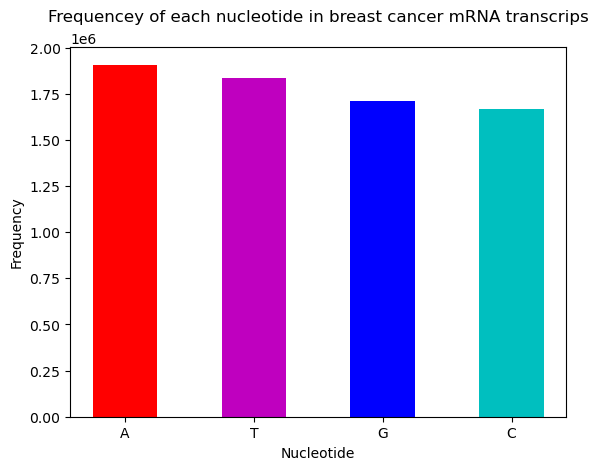

In [5]:
A = 0
T = 0 
G = 0 
C = 0
for seq in filtered_sequences:
    A += seq.seq.count("A")
    T += seq.seq.count("T")
    G += seq.seq.count("G")
    C += seq.seq.count("C")
nuc = [A, T, G, C]
name = ['A', 'T', 'G', 'C']
plt.bar(name, nuc, width=0.5, color = ['r', 'm', 'b', 'c'])
plt.xlabel('Nucleotide')
plt.ylabel("Frequency")
plt.title('Frequencey of each nucleotide in breast cancer mRNA transcrips\n')
plt.show()


[1.0395277095515083, 1.0254541857628012, 1.1437867747340529, 1.115395295678888]


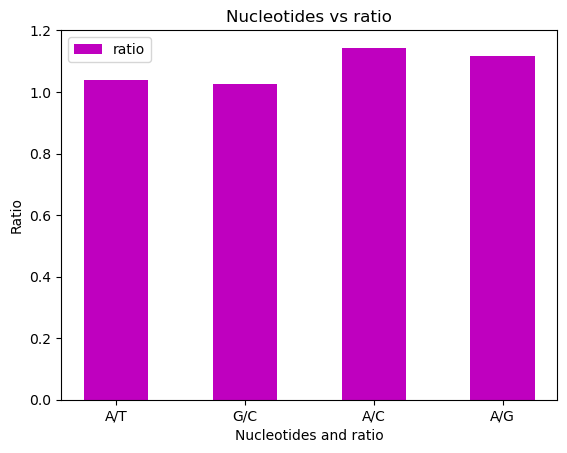

In [7]:
AT = A / T 
GC = G / C 
AC = A / C
AG = A / G
ratio = [AT, GC, AC, AG]
print(ratio)
x = np.arange(len(ratio))
ratio_labels = ['A/T', 'G/C', 'A/C', 'A/G']
#plt.bar(name, nuc, width= 0.5, color = 'r', label='nucleotide')
plt.bar(ratio_labels, ratio, width=0.5, color = 'm', label='ratio')
plt.xlabel("Nucleotides and ratio")
plt.ylabel("Ratio")
plt.title('Nucleotides vs ratio')
plt.legend()
plt.show()
# plt.xlim(-2.0, 10.0)

Isoleucine codon frequency:
ATT: 43937
ATA: 29313
ATC: 28550


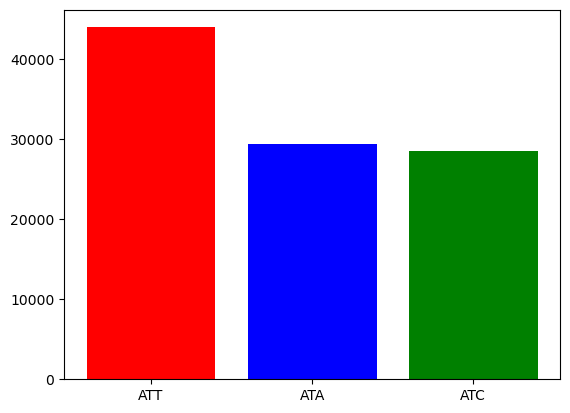

In [8]:
isoleucine_codons = ['ATA', 'ATC', 'ATT']

def codon_frequency(sequences, codons):
    frequency = {}
    for i in range(len(sequences)):
        sequence = sequences[i]
        codon = str()
        
        for nucleotide in sequence:
            codon += nucleotide
        
            if len(codon) % 3 == 0:
                if codon in isoleucine_codons:
                    try:
                        frequency[codon] += 1
                    except:
                        frequency[codon] = 0
                    codon = str()
                else:
                    codon = str()
    return frequency

input_file = "nucleotide_seq.fasta"
sequences1 = [str(record.seq) for record in SeqIO.parse(input_file, "fasta")]
frequency = codon_frequency(sequences1, isoleucine_codons)

print("Isoleucine codon frequency:")
for codon, count in frequency.items():
    print(f"{codon}: {count}")
codons = frequency.keys()
count = frequency.values()
plt.bar(codons, count, color = ['r', 'b', 'g'])
plt.show()

# ribosomal activity -- 
# polymera II and III !
# kinetic
#  tRNA ...
# relative conc of tRNA molecules in a cell. 
# tool (webapp)
# point mutationtions / polymorphisms. 


From research article:
    These functional studies revealed that tRNAIle **UAU** *promoted* and tRNAIle **GAU** *suppressed* breast cancer metastatic colonization.
 
 tRNA 5'UAU 3' = codon 5' ATA' **promoting tumor growth** and we have relatively less of it. 
 tRNA 5'GAU 3' = codon 5' ATC' **supressing**
 
 Now may be directly look into tRNA data rather than mRNA and see if there is higher frequency in 5' TAT 3'. 

# Relative Codon Usage for other Amino Acids

In [9]:
arginine_codons = ["CGT", "CGC", "CGA", "CGG", "AGA", "AGG"]
alanine_codons = ["GCA", "GCC", "GCG", "GCT"]
asparagine_codons = ["AAC", "AAT"]
aspartic_acid_codons = ["GAC", "GAT"]
cysteine_codons = ["TGC", "TGT"]
glutamic_acid_codons = ["GAA", "GAG"]
glutamine_codons = ["CAA", "CAG"]
glycine_codons = ["GGC", "GGT", "GGA", "GGG"]
histidine_codons = ["CAC", "CAT"]
leucine_codons = ["CTA", "CTC", "CTG", "CTT", "TTA", "TTG"]
lysine_codons = ["AAA", "AAG"]
methionine_codons = ["ATG"]
phenylalanine_codons = ["TTC", "TTT"]
proline_codons = ["CCC", "CCT", "CCA", "CCG"]
serine_codons = ["TCC", "TCT", "TCA", "TCG", "AGC", "AGT"]
threonine_codons = ["ACC", "ACT", "ACA", "ACG"]
tryptophan_codons = ["TGG"]
tyrosine_codons = ["TAC", "TAT"]
valine_codons = ["GTA", "GTC", "GTG", "GTT"]


Arginine codon frequency:
CGG: 19418
AGG: 42402
AGA: 52191
CGC: 16556
CGT: 10813
CGA: 12239


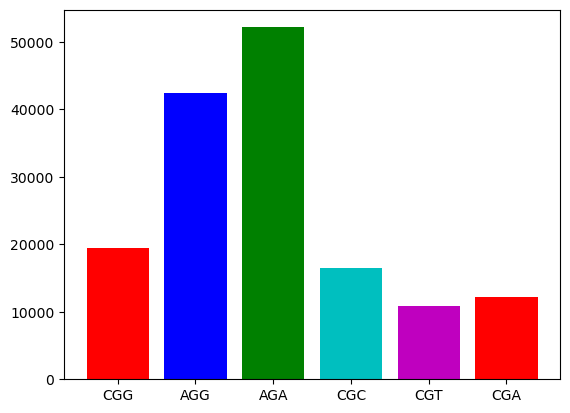

In [10]:
arginine_codons = ["CGT", "CGC", "CGA", "CGG", "AGA", "AGG"]
def codon_frequency(sequences, codons):
    frequency = {}
    for i in range(len(sequences)):
        sequence = sequences[i]
        codon = str()
        
        for nucleotide in sequence:
            codon += nucleotide
        
            if len(codon) % 3 == 0:
                if codon in arginine_codons:
                    try:
                        frequency[codon] += 1
                    except:
                        frequency[codon] = 0
                    codon = str()
                else:
                    codon = str()
    return frequency

input_file = "nucleotide_seq.fasta"
sequences1 = [str(record.seq) for record in SeqIO.parse(input_file, "fasta")]
frequency = codon_frequency(sequences1, arginine_codons)

print("Arginine codon frequency:")
for codon, count in frequency.items():
    print(f"{codon}: {count}")
codons = frequency.keys()
count = frequency.values()
plt.bar(codons, count, color = ['r', 'b', 'g', 'c', 'm'])
plt.show()

Stop codon frequency:
TGA: 43211
TAA: 32094
TAG: 19112


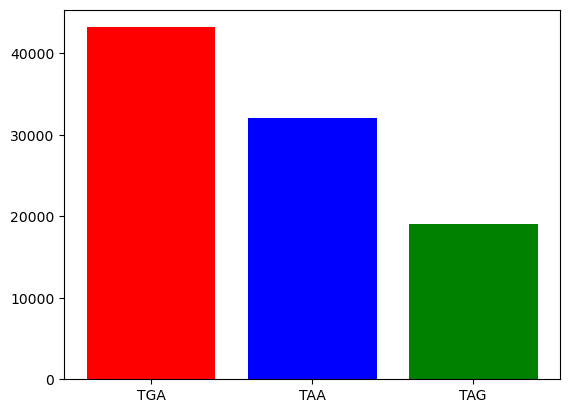

In [11]:
stop_codons = ["TAA", "TAG", "TGA"]
def codon_frequency(sequences, codons):
    frequency = {}
    for i in range(len(sequences)):
        sequence = sequences[i]
        codon = str()
        
        for nucleotide in sequence:
            codon += nucleotide
        
            if len(codon) % 3 == 0:
                if codon in stop_codons:
                    try:
                        frequency[codon] += 1
                    except:
                        frequency[codon] = 0
                    codon = str()
                else:
                    codon = str()
    return frequency

input_file = "nucleotide_seq.fasta"
sequences1 = [str(record.seq) for record in SeqIO.parse(input_file, "fasta")]
frequency = codon_frequency(sequences1, stop_codons)

print("Stop codon frequency:")
for codon, count in frequency.items():
    print(f"{codon}: {count}")
codons = frequency.keys()
count = frequency.values()
plt.bar(codons, count, color = ['r', 'b', 'g', 'c', 'm'])
plt.show()

In [10]:
# Searching for Research Articles
request = Entrez.esearch(db="pubmed", term="Breast Cancer AND Synonymous codons", retmax = 50)
articles = Entrez.read(request)
request.close()
idList = articles["IdList"]
print(idList)
article = Entrez.efetch(db="pubmed", id = idList, rettype = 'medline')
art_records = Medline.parse(article)
art_records = list(art_records)
for record in art_records:
    print("title:", record.get("TI", "?"))
    print("authors:", record.get("AU", "?"))
    print("source:", record.get("AB", "?"))
    print("")

['36510010', '36064557', '35860410', '34321100', '32994724', '32943010', '30585209', '24719079', '22615956', '22447520', '21811815', '21474413', '19899408', '19229607', '17935911', '17262179', '16399771', '14695169', '11836564']
title: Two isoleucyl tRNAs that decode synonymous codons divergently regulate breast cancer metastatic growth by controlling translation of proliferation-regulating genes.
authors: ['Earnest-Noble LB', 'Hsu D', 'Chen S', 'Asgharian H', 'Nandan M', 'Passarelli MC', 'Goodarzi H', 'Tavazoie SF']
source: The human genome contains 61 codons encoding 20 amino acids. Synonymous codons representing a given amino acid are decoded by a set of transfer RNAs (tRNAs) called isoacceptors. We report the surprising observation that two isoacceptor tRNAs that decode synonymous codons become modulated in opposing directions during breast cancer progression. Specifically, tRNA(Ile)(UAU) became upregulated, whereas tRNA(Ile)(GAU) became repressed as breast cancer cells attained en

# Some Research Papers
1. https://www.nature.com/articles/nrg2899

2. Sharp PM, Li W-H (1987) The codon adaptation index—a measure of directional synonymous codon usage bias, and its potential applications. Nucleic Acids Res. 15:1281–1295.

3. Tuller T, Petrov DA (2010) The interplay between codon usage bias, translational accuracy, and the error catastrophe. J Mol Evol. 71:3–16.

4. Wilke CO (2001) Evolution of the genetic code: relations between the patterns of codon usage and the properties of encoded amino acids. Nucleic Acids Res. 29:4575–4583.

5. Duret L, Mouchiroud D (1999) Codon usage in the E. coli genome: correlation with gene expressivity. Nucleic Acids Res. 27:1564–1572.

6. Kojima S, Gojobori T (1999) Codon usage biases and the evolutionary history of the genes in vertebrates. Nucleic Acids Res. 27:2697–2705.

In [31]:
# working with APOE gene that has lower rate of mutations

APOE = Entrez.esearch(db='nucleotide', term='APOE AND human[orgn]', retmax = 2000)
AP_record = Entrez.read(APOE)
APOE.close()
APOE_ID = AP_record['IdList']

# fetching the data 
AP_fasta = Entrez.efetch(db='nucleotide', rettype = 'fasta', retmode = 'text', id= APOE_ID)
APfasta_read = AP_fasta.read()
AP_fasta.close()
with open("APOE_transcript.fasta", 'w') as g:
    g.write(APfasta_read)
g.close()




In [32]:
# cleaning data
APsequences = SeqIO.parse("APOE_transcript.fasta", "fasta")
APfiltered_sequences = [seq for seq in APsequences if "NM" in seq.id]
SeqIO.write(filtered_sequences, "APOE_transcript.fasta", "fasta")
print(len(APfiltered_sequences))

175


Serine codon frequency in APOE:
TCG: 10963
AGC: 43394
TCT: 43946
TCC: 38443
TCA: 41533
AGT: 35144


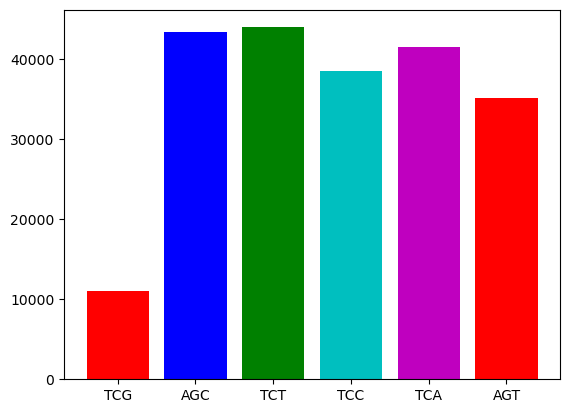

In [35]:
# Relative Codon Usage for other Amino Acids for APOE gene
serine_codons = ["TCC", "TCT", "TCA", "TCG", "AGC", "AGT"]

def codon_frequency(sequences, codons):
    frequency = {}
    for i in range(len(sequences)):
        sequence = sequences[i]
        codon = str()
        
        for nucleotide in sequence:
            codon += nucleotide
        
            if len(codon) % 3 == 0:
                if codon in serine_codons:
                    try:
                        frequency[codon] += 1
                    except:
                        frequency[codon] = 0
                    codon = str()
                else:
                    codon = str()
    return frequency

file1 = "APOE_transcript.fasta"
APOE_sequences = [str(record.seq) for record in SeqIO.parse(file1, "fasta")]
codon_usage = codon_frequency(APOE_sequences, serine_codons)

print("Serine codon frequency in APOE:")
for APcodons, APcount in codon_usage.items():
    print(f"{APcodons}: {APcount}")
AP_codons = codon_usage.keys()
AP_count = codon_usage.values()
plt.bar(AP_codons, AP_count, color = ['r', 'b', 'g', 'c', 'm'])
plt.show()


Isoleucine codon frequency in APOE:
ATT: 43937
ATA: 29313
ATC: 28550


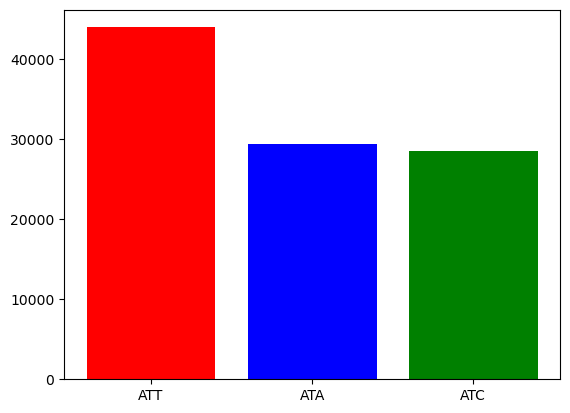

In [37]:
# for isoleucine codons

isoleucine_codons = ['ATA', 'ATC', 'ATT']
def codon_frequency(sequences, codons):
    frequency = {}
    for i in range(len(sequences)):
        sequence = sequences[i]
        codon = str()
        
        for nucleotide in sequence:
            codon += nucleotide
        
            if len(codon) % 3 == 0:
                if codon in isoleucine_codons:
                    try:
                        frequency[codon] += 1
                    except:
                        frequency[codon] = 0
                    codon = str()
                else:
                    codon = str()
    return frequency
codon_usage = codon_frequency(APOE_sequences, isoleucine_codons)

print("Isoleucine codon frequency in APOE:")
for APcodons, APcount in codon_usage.items():
    print(f"{APcodons}: {APcount}")
AL_codons = codon_usage.keys()
AL_count = codon_usage.values()
plt.bar(AL_codons, AL_count, color = ['r', 'b', 'g', 'c', 'm'])
plt.show()

In [ ]:
# tRNA expression (tRNA-Ile-TAT-3-1)
# https://hanlab.uth.edu/tRic/trna/


https://hanlab.uth.edu/tRic/trna/ 